In [17]:
%matplotlib inline
# Example from Andy Connolly
# See Ivezic, Figure 7.4
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
#from sklearn.decomposition import RandomizedPCA

from astroML.datasets import sdss_corrected_spectra
from astroML.utils import pickle_results

#------------------------------------------------------------
# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)
print(len(spectra), len(wavelengths))

#----------------------------------------------------------------------
# Compute PCA
#np.random.seed(500)
nrows = 5000 # We'll just look at 2000 random spectra
n_components = 5 # Do the fit with 5 components, which is the mean plus 4
ind = np.random.randint(spectra.shape[0], size=nrows)

spec_mean = spectra[ind].mean(0) # Compute the mean spectrum, which is the first component
# spec_mean = spectra[:50].mean(0)

# use Randomized PCA for speed
#pca = RandomizedPCA(n_components - 1)
pca = PCA(n_components - 1,svd_solver='randomized')
pca.fit(spectra[ind])
pca_comp = np.vstack([spec_mean,pca.components_]) #Add the mean to the components
evals = pca.explained_variance_ratio_ 
print(evals)



4000 1000
[0.71077496 0.23871195 0.02813208 0.00857644]


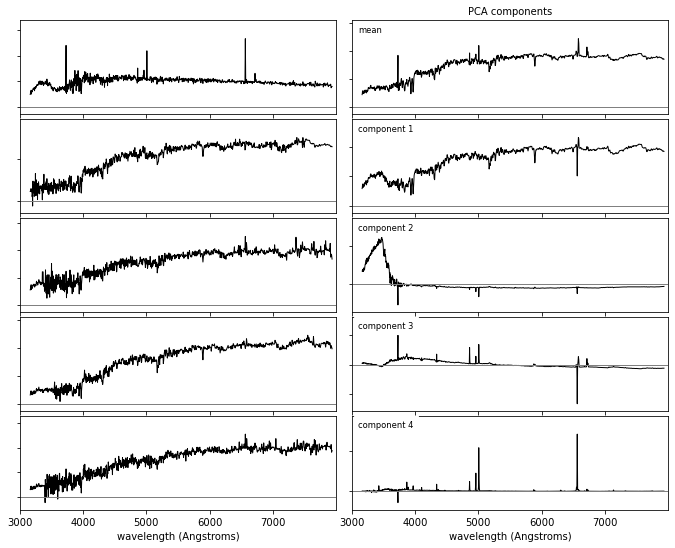

In [18]:
#Make plots
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = 'PCA components'

for j in range(n_components):
    
    # plot the components
    ax = fig.add_subplot(n_components, 2, 2*j+2)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel('wavelength (Angstroms)')
    ax.plot(wavelengths, pca_comp[j], '-k', lw=1)

    # plot zero line
    xlim = [3000, 7999]
    ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax.set_xlim(xlim)

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    # plot the first j spectra
    ax2 = fig.add_subplot(n_components, 2, 2*j+1)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel('wavelength (Angstroms)')
    ax2.plot(wavelengths, spectra[j], '-k', lw=1)
    
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)

    if j == 0:
        ax.set_title(titles, fontsize='medium')
    if j == 0:
        label = 'mean'
    else:
        label = 'component %i' % j

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


standard: 26 sec


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Isomap: 31 sec
t-SNE: 72 sec


(-744.7988586425781, 7424.815338134766, -3529.6898559570313, 9997.907385253906)

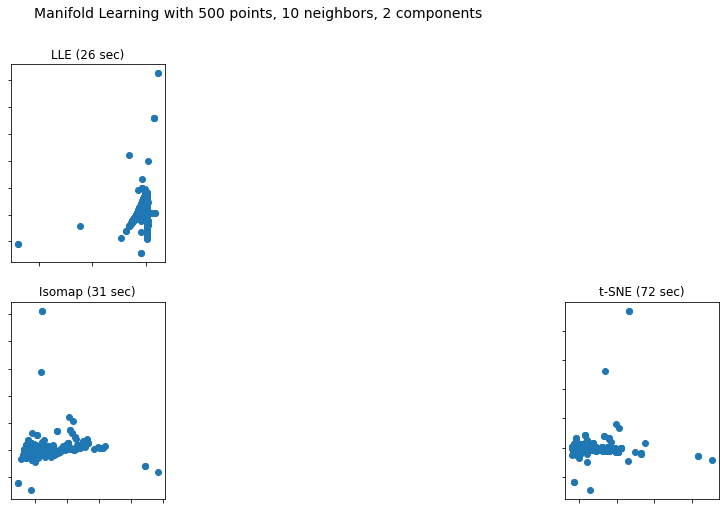

In [19]:
# Let's re-run the example
# In case you experience problems with any of the methods that are using eigen_solver='auto', try switching to eigen_solver='dense'
# Runtime for more than 1000 points can be up to 2 minutes

#n_points = 500
n_neighbors = 10
n_components = 2 

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, %i components"
             % (n_points, n_neighbors, n_components), fontsize=14)

methods = ['standard']
labels = ['LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(spectra[ind])
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1])
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(spectra[ind])
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1])
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(spectra[ind])
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1])
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

In [20]:
from sklearn.decomposition import FastICA

nrows = 500
n_components = 5
ind = np.random.randint(spectra.shape[0], size=nrows)


spec_mean = spectra[ind].mean(0)
# spec_mean = spectra[:50].mean(0)

ica = FastICA(n_components - 1)
ica.fit(spectra[ind])
ica_comp = np.vstack([spec_mean,ica.components_]) #Add the mean to the components

print(ica_comp)

[[ 4.89446878e+00  5.18598509e+00  6.02747822e+00 ...  1.71424828e+01
   1.72788563e+01  1.70788803e+01]
 [-2.16882929e-06 -1.67522413e-06 -1.85559767e-06 ...  7.69371950e-06
   7.72374292e-06  7.61492533e-06]
 [ 4.40890961e-05  4.05209395e-05  4.29295926e-05 ... -6.18453214e-06
  -6.90801122e-06 -8.05829526e-06]
 [ 8.87897808e-06  1.04645058e-05  9.38449045e-06 ...  1.22192321e-05
   1.21443645e-05  1.14927429e-05]
 [-9.67422308e-06 -9.80505069e-06 -1.00053287e-05 ...  2.97315948e-06
   2.92557379e-06  2.90013676e-06]]


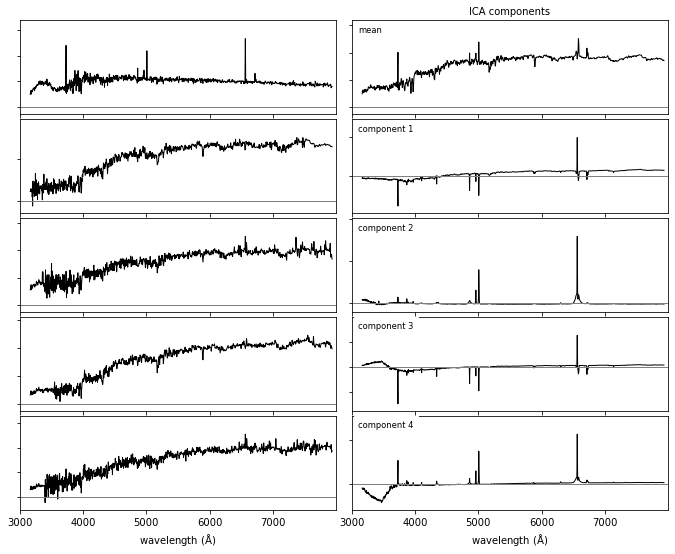

In [21]:
#Make plots
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = 'ICA components'

for j in range(n_components):
    
    # plot the components
    ax = fig.add_subplot(n_components, 2, 2*j+2)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength ${\rm (\AA)}$')
    ax.plot(wavelengths, ica_comp[j], '-k', lw=1)

    # plot zero line
    xlim = [3000, 7999]
    ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax.set_xlim(xlim)

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

    # plot the first j spectra
    ax2 = fig.add_subplot(n_components, 2, 2*j+1)
    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
    if j < n_components - 1:
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax2.set_xlabel(r'wavelength ${\rm (\AA)}$')
    ax2.plot(wavelengths, spectra[j], '-k', lw=1)
    
    # plot zero line
    ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
    ax2.set_xlim(xlim)

    if j == 0:
        ax.set_title(titles, fontsize='medium')

    if j == 0:
        label = 'mean'
    else:
        label = 'component %i' % j

    # adjust y limits
    ylim = plt.ylim()
    dy = 0.05 * (ylim[1] - ylim[0])    
    ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)


    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            ha='left', va='top', bbox=dict(ec='w', fc='w'),
            fontsize='small')

plt.show()

Automatically created module for IPython interactive environment


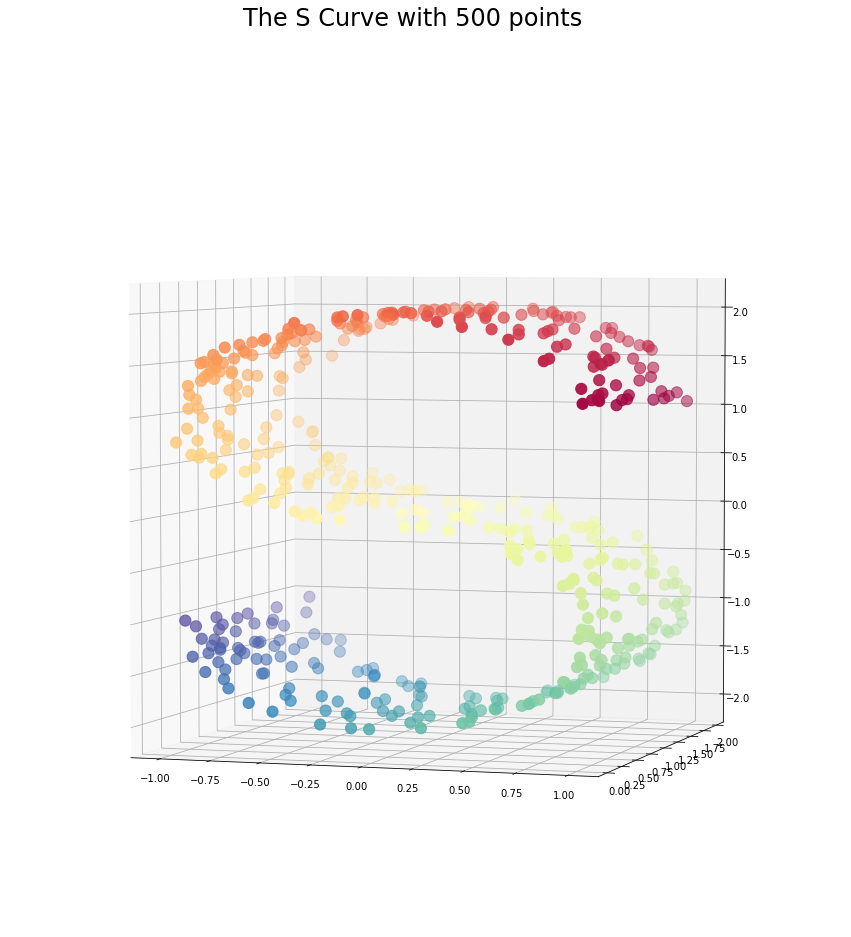

In [22]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 500
X, color = datasets.make_s_curve(n_points, random_state=0)

fig = plt.figure(figsize=(15, 15))
plt.suptitle("The S Curve with %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral,s=125)
ax.view_init(4, -72)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


standard: 0.07 sec
Isomap: 0.098 sec
t-SNE: 3.3 sec


(-46.95757617950439,
 44.68695011138916,
 -10.098440742492675,
 13.659535026550293)

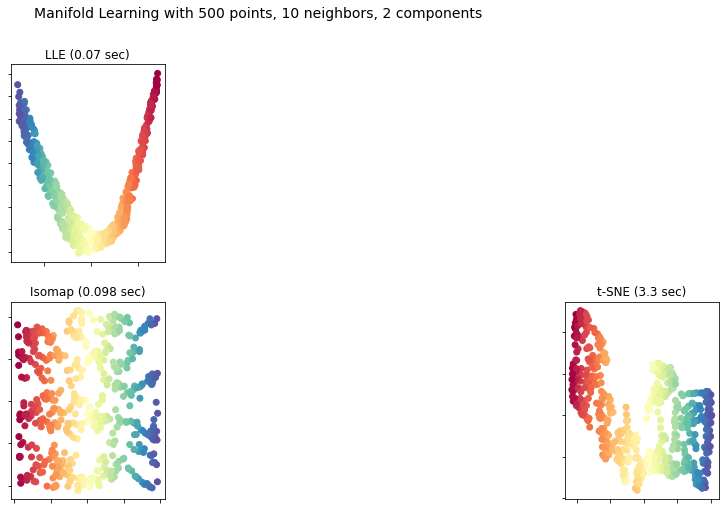

In [23]:
# Let's re-run the example
# In case you experience problems with any of the methods that are using eigen_solver='auto', try switching to eigen_solver='dense'
# Runtime for more than 1000 points can be up to 2 minutes

#n_points = 500
n_neighbors = 10
n_components = 2 # This is the parameter that I changed to 3 in the above example

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, %i components"
             % (n_points, n_neighbors, n_components), fontsize=14)

methods = ['standard']
labels = ['LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


(-2.153942538841668, 2.254912325631376, -1.310435450567926, 1.388780966044068)

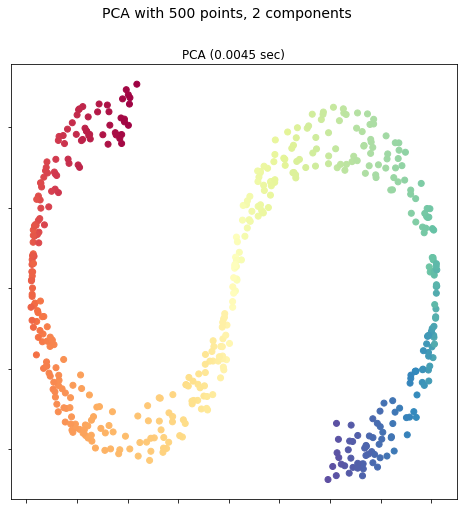

In [24]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 8))
plt.suptitle("PCA with %i points, %i components"
             % (n_points, n_components), fontsize=14)

init_random_state=0

t0 = time()
pca = PCA(n_components=2)
Y = pca.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('PCA', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

(-0.08604907438705946,
 0.08124847946451458,
 -0.07332982985008007,
 0.07005462965933001)

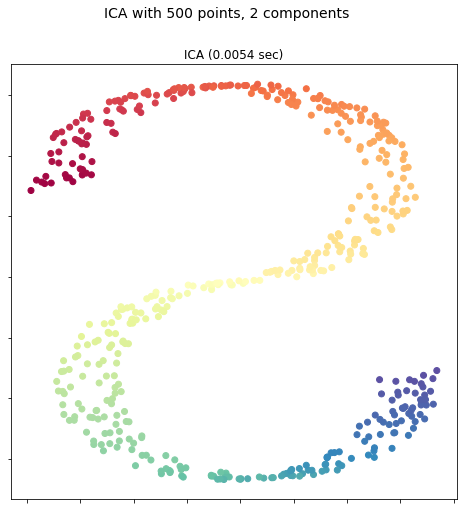

In [25]:
fig = plt.figure(figsize=(8, 8))
plt.suptitle("ICA with %i points, %i components"
             % (n_points, n_components), fontsize=14)

init_random_state=0

t0 = time()
ica = FastICA(n_components=2)
Y = ica.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('ICA', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')